# Humpback Whale Identification 
## Kaggle competition
https://www.kaggle.com/c/humpback-whale-identification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
import pandas as pd
import numpy as np

In [3]:
# bath size
bs = 16

In [4]:
# see what is in the data
path = Path('/home/tom/Data/data/whale/')
path.ls()

[PosixPath('/home/tom/Data/data/whale/train.csv'),
 PosixPath('/home/tom/Data/data/whale/test'),
 PosixPath('/home/tom/Data/data/whale/models'),
 PosixPath('/home/tom/Data/data/whale/sample_submission.csv'),
 PosixPath('/home/tom/Data/data/whale/train')]

In [5]:
labels = pd.read_csv(path/'train.csv')

In [22]:
labels

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale
5,0006e997e.jpg,new_whale
6,000a6daec.jpg,w_dd88965
7,000f0f2bf.jpg,new_whale
8,0016b897a.jpg,w_64404ac
9,001c1ac5f.jpg,w_a6f9d33


In [7]:
!ls {path/'train'} | head

0000e88ab.jpg
0001f9222.jpg
00029d126.jpg
00050a15a.jpg
0005c1ef8.jpg
0006e997e.jpg
000a6daec.jpg
000f0f2bf.jpg
0016b897a.jpg
001c1ac5f.jpg
ls: write error: Broken pipe


In [8]:
doc(ImageDataBunch)

In [25]:
img = open_image(path/'train/d3252cbf1.jpg')

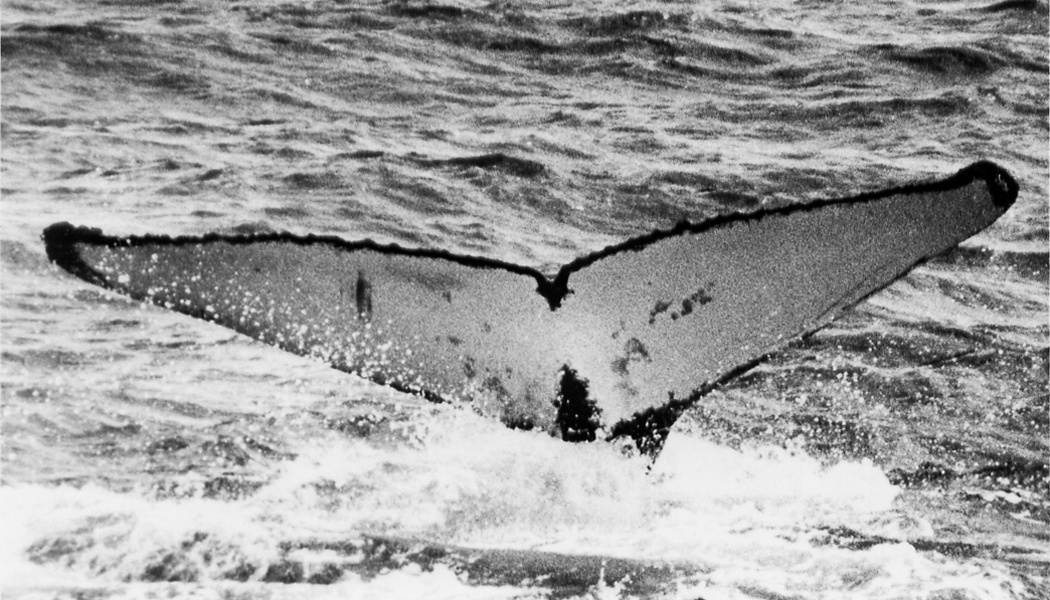

In [26]:
img

In [10]:
img.shape

torch.Size([3, 450, 1050])

In [29]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path=path, folder='train', csv_labels='train.csv', test='test', 
                               size=224, bs=bs ) #.normalize(imagenet_stats)

/home/tom/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:475: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the folowing unknown labels, the corresponding items have been discarded.
w_39ea8fa, w_d8ae71c, w_ef62b09, w_5966e55, w_b07ec5d...
  if getattr(ds, 'warn', False): warn(ds.warn)


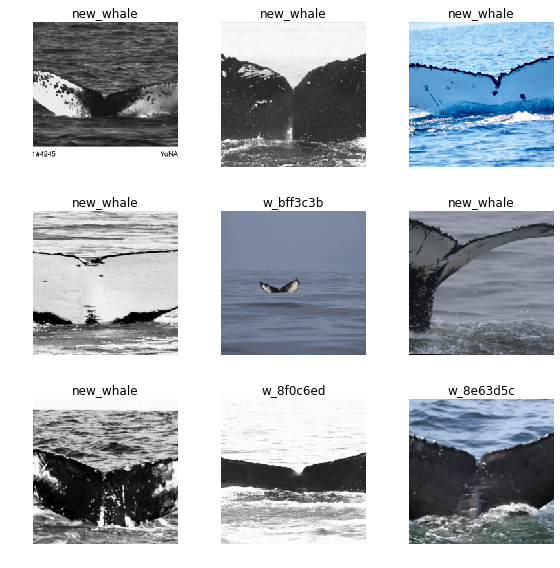

In [30]:
data.show_batch(rows=3, figsize=(8,8))

In [31]:
len(data.classes)

4571

In [32]:
data.c, len(data.train_ds)+len(data.valid_ds)

(4571, 24880)

In [33]:
learn = create_cnn(data, models.resnet34)

In [16]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss
1,6.100906,5.171466


In [17]:
learn.save('stage-1')

## look at model 

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

In [19]:
len(data.valid_ds), len(losses), len(idxs)

(4591, 4591, 4591)

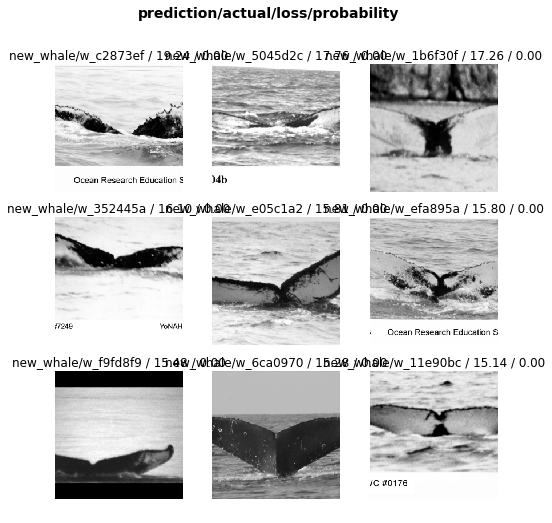

In [20]:
interp.plot_top_losses(9, largest=True, figsize=(8, 8))